In [ ]:
#1. Predict conversion rate

#2. Come up with recommendations for the product team and the marketing team to improve conversion rate

# Data Load

In [32]:
import numpy as np
import pandas as pd
data=pd.read_csv("conversion_project.csv")
  
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [33]:
data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [34]:
#clean data which is pretty good
data.isnull().sum()

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

In [35]:
data.groupby(['country']).size()

country
China       76602
Germany     13056
UK          48450
US         178092
dtype: int64

In [36]:
data.groupby(['source']).size()

source
Ads        88740
Direct     72420
Seo       155040
dtype: int64

In [37]:
#max age is 123 which is weird.
data[data['age']>100]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


In [38]:
#people filled their age over 100 may not be trustable 
data = data[data['age']<100]

# Data Visualization

In [39]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Mean Conversion Rate per Country')

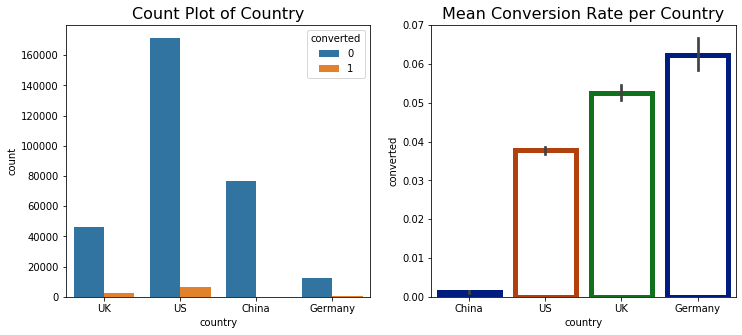

In [40]:
fig,(axis1,axis2) = plt.subplots(1,2,figsize=(12,5))

sns.countplot(x='country',hue='converted',data=data,ax = axis1)
axis1.set_title('Count Plot of Country', fontsize=16)

sns.barplot(x='country', y='converted', data=data, ax = axis2, order=['China','US','UK','Germany'],
            facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3))
axis2.set_title('Mean Conversion Rate per Country', fontsize=16)

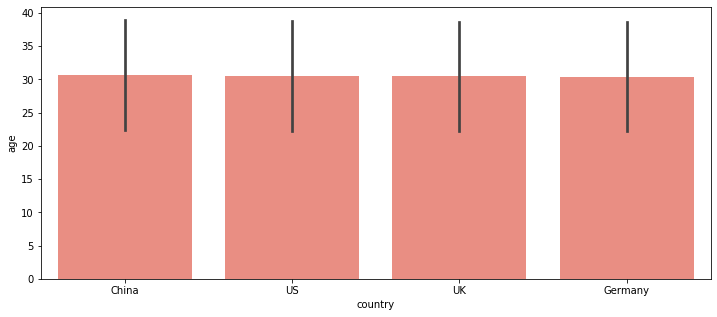

In [41]:
plt.subplots(figsize=(12,5))
sns.barplot(x='country', y='age', data=data,order=['China','US','UK','Germany'],color="salmon",ci='sd')

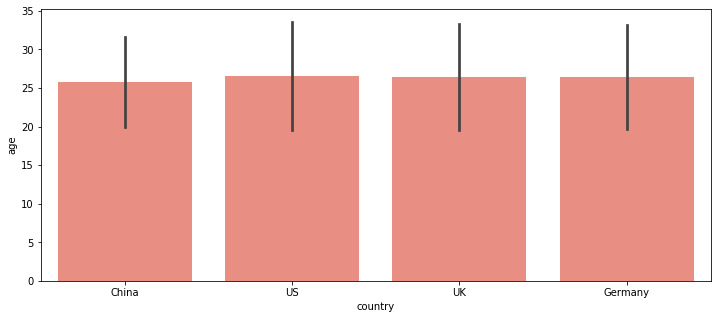

In [42]:
data1=data[data['converted']==1]
plt.subplots(figsize=(12,5))
sns.barplot(x='country', y='age', data=data1,order=['China','US','UK','Germany'],color="salmon",ci='sd')

Text(0.5, 1.0, 'Mean Conversion Rate per Source')

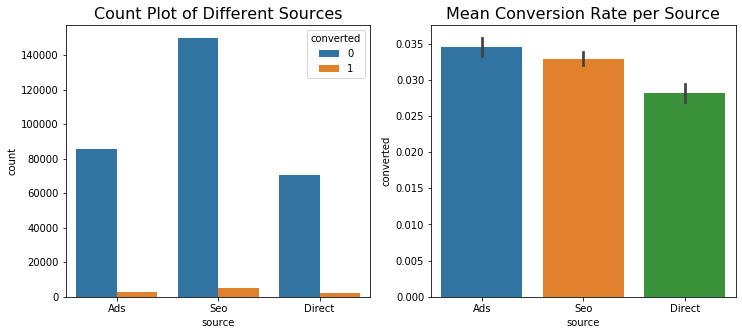

In [46]:
fig,(axis1,axis2) = plt.subplots(1,2,figsize=(12,5))

sns.countplot(x='source', hue='converted', data=data, ax=axis1)
axis1.set_title('Count Plot of Different Sources', fontsize=16)

sns.barplot(x='source', y='converted', data=data, ax=axis2);
axis2.set_title('Mean Conversion Rate per Source', fontsize=16)

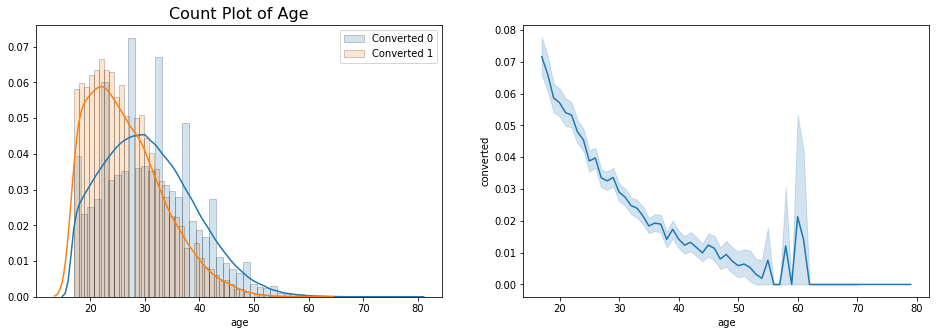

In [53]:
fig,(axis1,axis2) = plt.subplots(1,2,figsize=(16,5))
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}

sns.distplot(data[data['converted'] == 0]['age'], label='Converted 0', 
             ax=axis1, hist_kws=hist_kws)
sns.distplot(data[data['converted'] == 1]['age'], label='Converted 1', 
             ax=axis1, hist_kws=hist_kws)
axis1.set_title('Count Plot of Age', fontsize=16)
axis1.legend()

sns.lineplot(data=data, x="age", y="converted",ax = axis2)

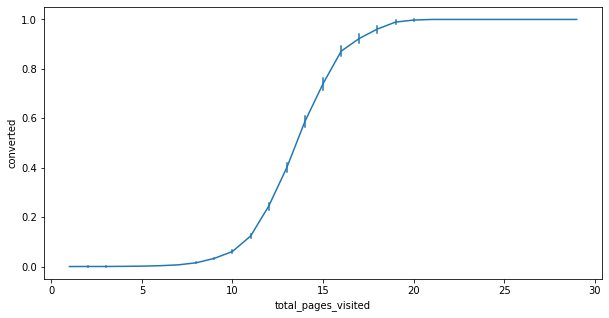

In [52]:
plt.subplots(figsize=(10,5))
sns.lineplot(data=data, x="total_pages_visited", y="converted",err_style="bars")

In [83]:
#1. German customers have the highest conversion rate but the population is the least. 
#2. The conversion rate of Chinese is too low. Try to find whether it is the problem about demographic but it is not.
#3. People visit more than 15 pages are much likely to be converted as customer.
#4. Generally, the younger customers are, the more likely they be converted.

# Feature Engineering and Modeling

In [57]:
data['country']=data['country'].map({'China':0,'Germany':1,'UK':2,'US':3})
data['country']=data['country'].astype(int)
data['source'] = data['source'].map({'Seo':0,'Ads':1,'Direct':2})
data['source'] = data['source'].astype(int)
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,2,25,1,1,1,0
1,3,23,1,0,5,0
2,3,28,1,0,4,0
3,0,39,1,0,5,0
4,3,30,1,0,6,0


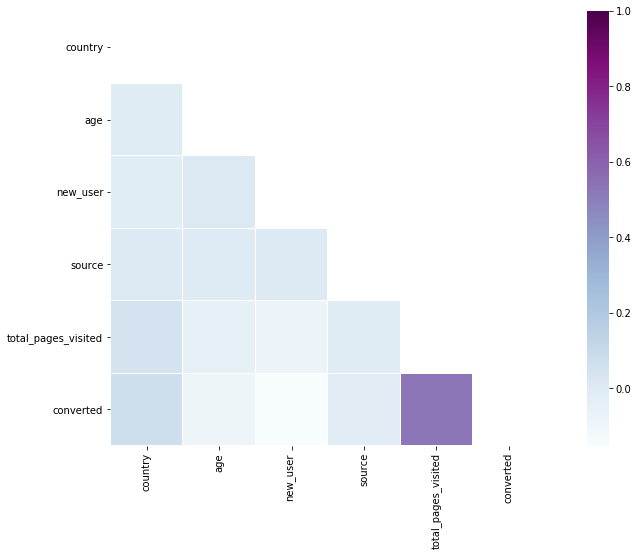

In [58]:
correlation=data.corr()
mask = np.zeros_like(correlation, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (15, 8))

sns.heatmap(correlation, mask = mask,
            square = True, linewidths = .3, ax = ax,cmap = "BuPu")      
plt.show()

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [60]:
y=data['converted']
X=data.drop(['converted'],1)
X_train,X_val,y_train,y_val=train_test_split(X,y,random_state=1,test_size=0.3)

In [62]:
rf = RandomForestRegressor(n_estimators = 128, max_depth=20,max_features='auto', n_jobs=4, random_state=35)
rf.fit(X, y)
y_pred = rf.predict(X_val)
y_pred

array([0.        , 0.        , 0.22608   , ..., 0.24284532, 0.        ,
       0.        ])

Text(0.5, 1.0, 'RF_Feature_Importance')

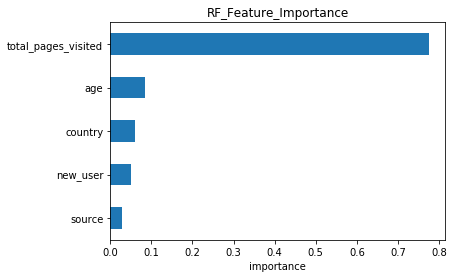

In [63]:
fi = pd.Series(rf.feature_importances_, index=X.columns)
fi.sort_values(ascending = True).plot(kind='barh')
plt.xlabel('importance')
plt.title('RF_Feature_Importance')

In [64]:
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.metrics import roc_auc_score
print("ROC",  roc_auc_score(y_val, y_pred))

ROC 0.993088845063074


In [70]:
regr = DecisionTreeRegressor(max_depth=3, random_state=1234)
model = regr.fit(X, y)

In [71]:
text_representation = tree.export_text(regr)
print(text_representation)

|--- feature_4 <= 12.50
|   |--- feature_4 <= 10.50
|   |   |--- feature_4 <= 8.50
|   |   |   |--- value: [0.00]
|   |   |--- feature_4 >  8.50
|   |   |   |--- value: [0.04]
|   |--- feature_4 >  10.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- value: [0.33]
|   |   |--- feature_2 >  0.50
|   |   |   |--- value: [0.08]
|--- feature_4 >  12.50
|   |--- feature_4 <= 14.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- value: [0.68]
|   |   |--- feature_2 >  0.50
|   |   |   |--- value: [0.27]
|   |--- feature_4 >  14.50
|   |   |--- feature_0 <= 0.50
|   |   |   |--- value: [0.22]
|   |   |--- feature_0 >  0.50
|   |   |   |--- value: [0.92]



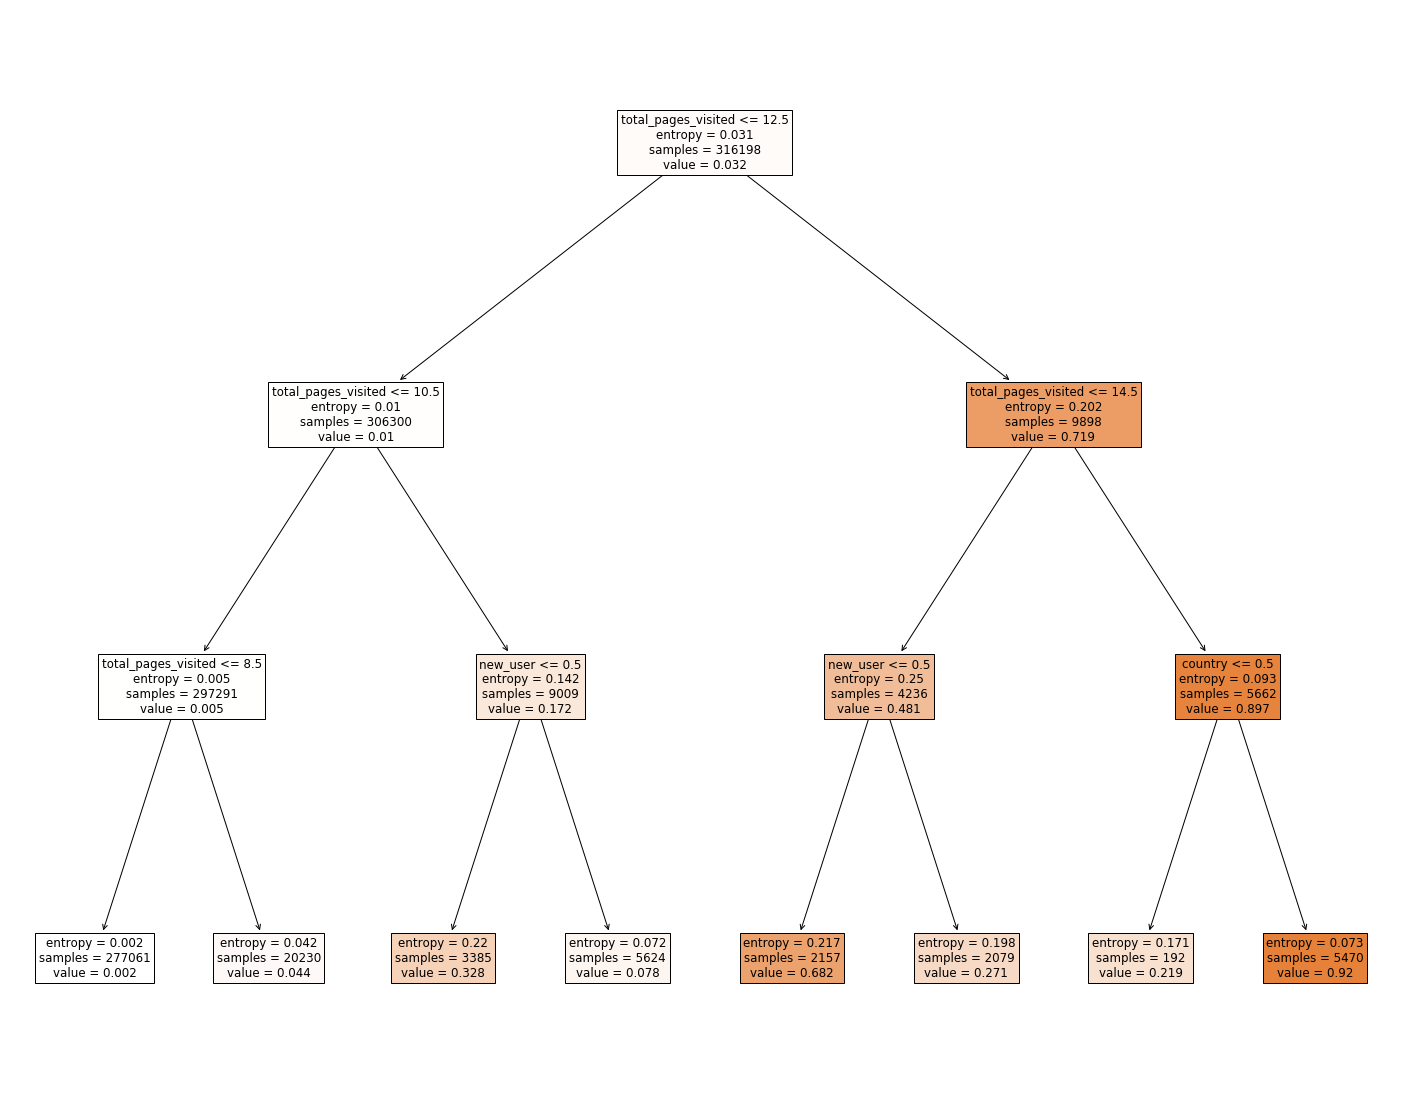

In [78]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr, feature_names=X.columns,
                   filled=True)

In [79]:
#total pages visited takes too much weight, so I will drop it to see how other factors impact the outcome

In [80]:
X1=data.drop(['converted','total_pages_visited'],1)

In [81]:
X_train1,X_val1,y_train1,y_val1=train_test_split(X1,y,random_state=1,test_size=0.3)

In [82]:
regr1 = DecisionTreeRegressor(max_depth=3, random_state=1234)
model1 = regr1.fit(X1, y)

In [83]:
text_representation = tree.export_text(regr1)
print(text_representation)

|--- feature_2 <= 0.50
|   |--- feature_0 <= 0.50
|   |   |--- feature_1 <= 35.50
|   |   |   |--- value: [0.00]
|   |   |--- feature_1 >  35.50
|   |   |   |--- value: [0.00]
|   |--- feature_0 >  0.50
|   |   |--- feature_1 <= 26.50
|   |   |   |--- value: [0.14]
|   |   |--- feature_1 >  26.50
|   |   |   |--- value: [0.06]
|--- feature_2 >  0.50
|   |--- feature_0 <= 0.50
|   |   |--- feature_1 <= 29.50
|   |   |   |--- value: [0.00]
|   |   |--- feature_1 >  29.50
|   |   |   |--- value: [0.00]
|   |--- feature_0 >  0.50
|   |   |--- feature_1 <= 24.50
|   |   |   |--- value: [0.03]
|   |   |--- feature_1 >  24.50
|   |   |   |--- value: [0.01]



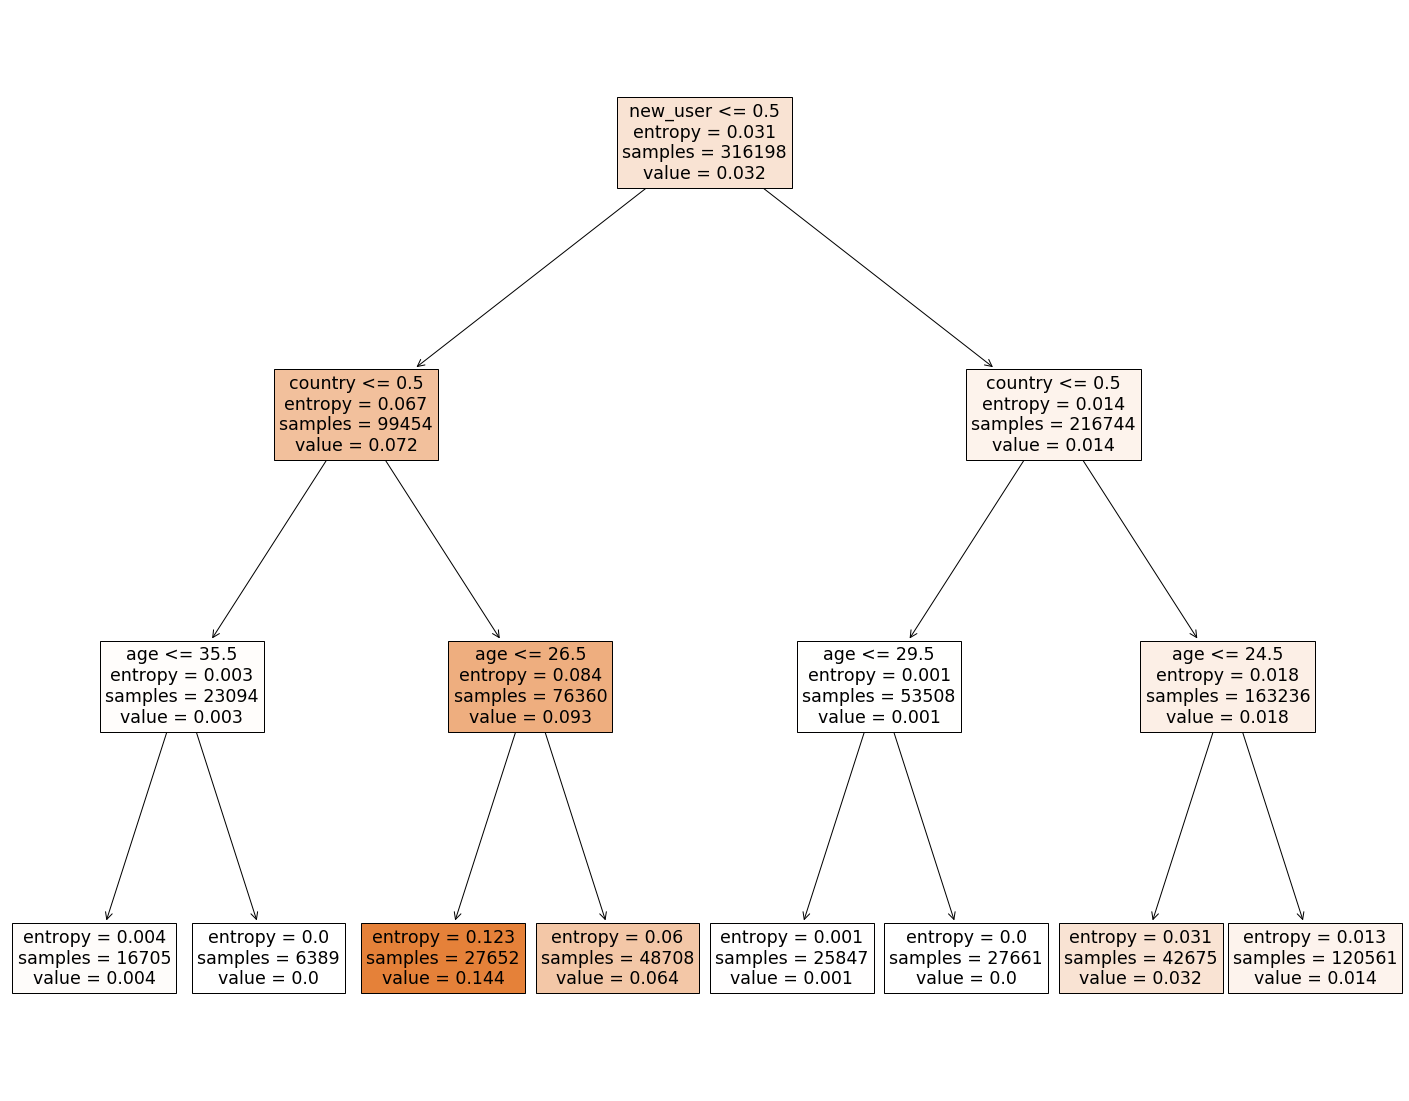

In [85]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr1, feature_names=X1.columns,
                   filled=True)

In [ ]:
# Source is not show in the tree so it is not very important. 
# For country, if the customer not come from China it will significantly increase the prob to convert as customers.